In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import resample
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [2]:
# Download NLTK resources (run this once)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Keny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Keny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load dataset
dataset_path = 'D:\Joki Skripsi\Mutia\wardah_pr.csv'  # Replace with the correct file path
dataset = pd.read_csv(dataset_path)

In [4]:
# Step 1: Handle missing data in 'age'
dataset['age'].fillna('Unknown', inplace=True)

In [5]:
# Step 2: Preprocessing the 'review' column
stop_words = set(stopwords.words('indonesian'))

def preprocess_text(text):
    text = text.lower()  # Case folding
    tokens = word_tokenize(text)  # Tokenizing
    tokens = [word for word in tokens if word.isalnum()]  # Remove non-alphanumeric tokens
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(filtered_tokens)

In [6]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Keny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
# Step 2: Preprocessing the 'review' column
stop_words = set(stopwords.words('indonesian'))

def preprocess_text(text):
    text = text.lower()  # Case folding
    tokens = word_tokenize(text)  # Tokenizing
    tokens = [word for word in tokens if word.isalnum()]  # Remove non-alphanumeric tokens
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(filtered_tokens)

dataset['processed_review'] = dataset['review'].apply(preprocess_text)

In [8]:
# Step 3: Handle class imbalance
dataset['is_recommended'] = dataset['is_recommended'].apply(lambda x: 1 if x.lower() == 'yes' else 0)
majority_class = dataset[dataset['is_recommended'] == 1]
minority_class = dataset[dataset['is_recommended'] == 0]

In [9]:
# Oversample minority class
minority_oversampled = resample(minority_class,
                                replace=True,
                                n_samples=len(majority_class),
                                random_state=42)

In [10]:
# Combine majority and oversampled minority class
balanced_dataset = pd.concat([majority_class, minority_oversampled])

In [11]:
# Step 4: Vectorize the processed reviews
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(balanced_dataset['processed_review'])

In [12]:
# Target variable
y = balanced_dataset['is_recommended']

In [13]:
# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Step 6: Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [15]:
# Step 7: Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification)

Accuracy: 0.8825995807127882
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.89       238
           1       0.98      0.78      0.87       239

    accuracy                           0.88       477
   macro avg       0.90      0.88      0.88       477
weighted avg       0.90      0.88      0.88       477



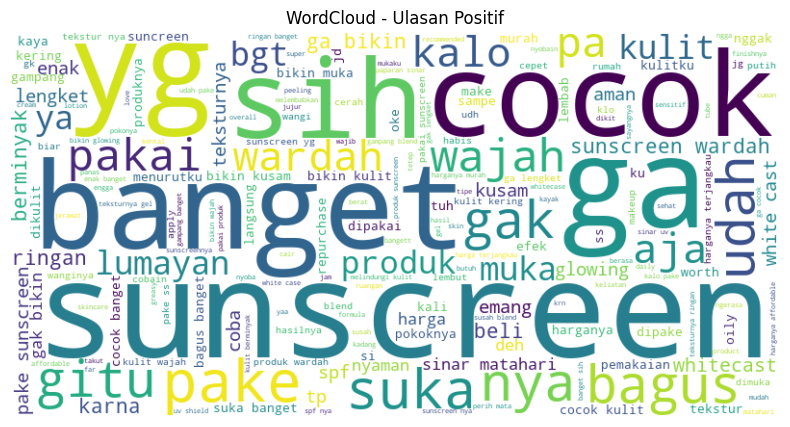

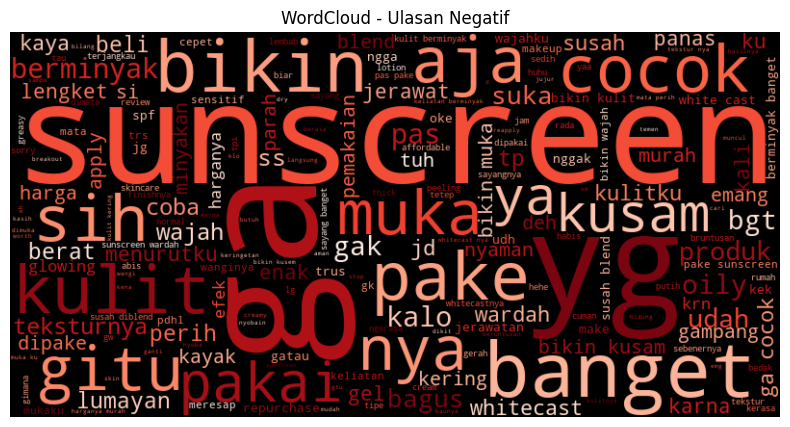

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Pisahkan ulasan positif dan negatif
positive_reviews = dataset[dataset['is_recommended'] == 1]['processed_review']
negative_reviews = dataset[dataset['is_recommended'] == 0]['processed_review']

# Gabungkan semua teks dalam kategori masing-masing
positive_text = " ".join(positive_reviews)
negative_text = " ".join(negative_reviews)

# Buat WordCloud untuk ulasan positif
wordcloud_positive = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

# Buat WordCloud untuk ulasan negatif
wordcloud_negative = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_text)

# Tampilkan WordCloud Positif
plt.figure(figsize=(10, 5))
plt.title("WordCloud - Ulasan Positif")
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()

# Tampilkan WordCloud Negatif
plt.figure(figsize=(10, 5))
plt.title("WordCloud - Ulasan Negatif")
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:

# Train your model (replace this with your actual training code)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example dataset splitting (replace X, y with your actual dataset features and labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example model training
trained_model = RandomForestClassifier(random_state=42)
trained_model.fit(X_train, y_train)

# Evaluate the model
y_pred = trained_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

# Save trained model
import joblib
model_filename = 'sentiment_analysis_model.pkl'
joblib.dump(trained_model, model_filename)
print(f"Model has been saved to {model_filename}")


In [ ]:

# Save the TfidfVectorizer used for text processing
import joblib

# Replace 'vectorizer' with your actual TfidfVectorizer instance
vectorizer_filename = 'tfidf_vectorizer.pkl'
joblib.dump(vectorizer, vectorizer_filename)
print(f"Vectorizer has been saved to {vectorizer_filename}")


In [ ]:

# Create and save TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Example preprocessing
# Replace 'data_texts' with your actual list of texts from the dataset
data_texts = dataset['processed_review']  # Assuming processed reviews are stored in this column
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_texts)  # Fit and transform the dataset

# Save the vectorizer
vectorizer_filename = 'tfidf_vectorizer.pkl'
joblib.dump(vectorizer, vectorizer_filename)
print(f"Vectorizer has been saved to {vectorizer_filename}")
